# Regression

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [78]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis

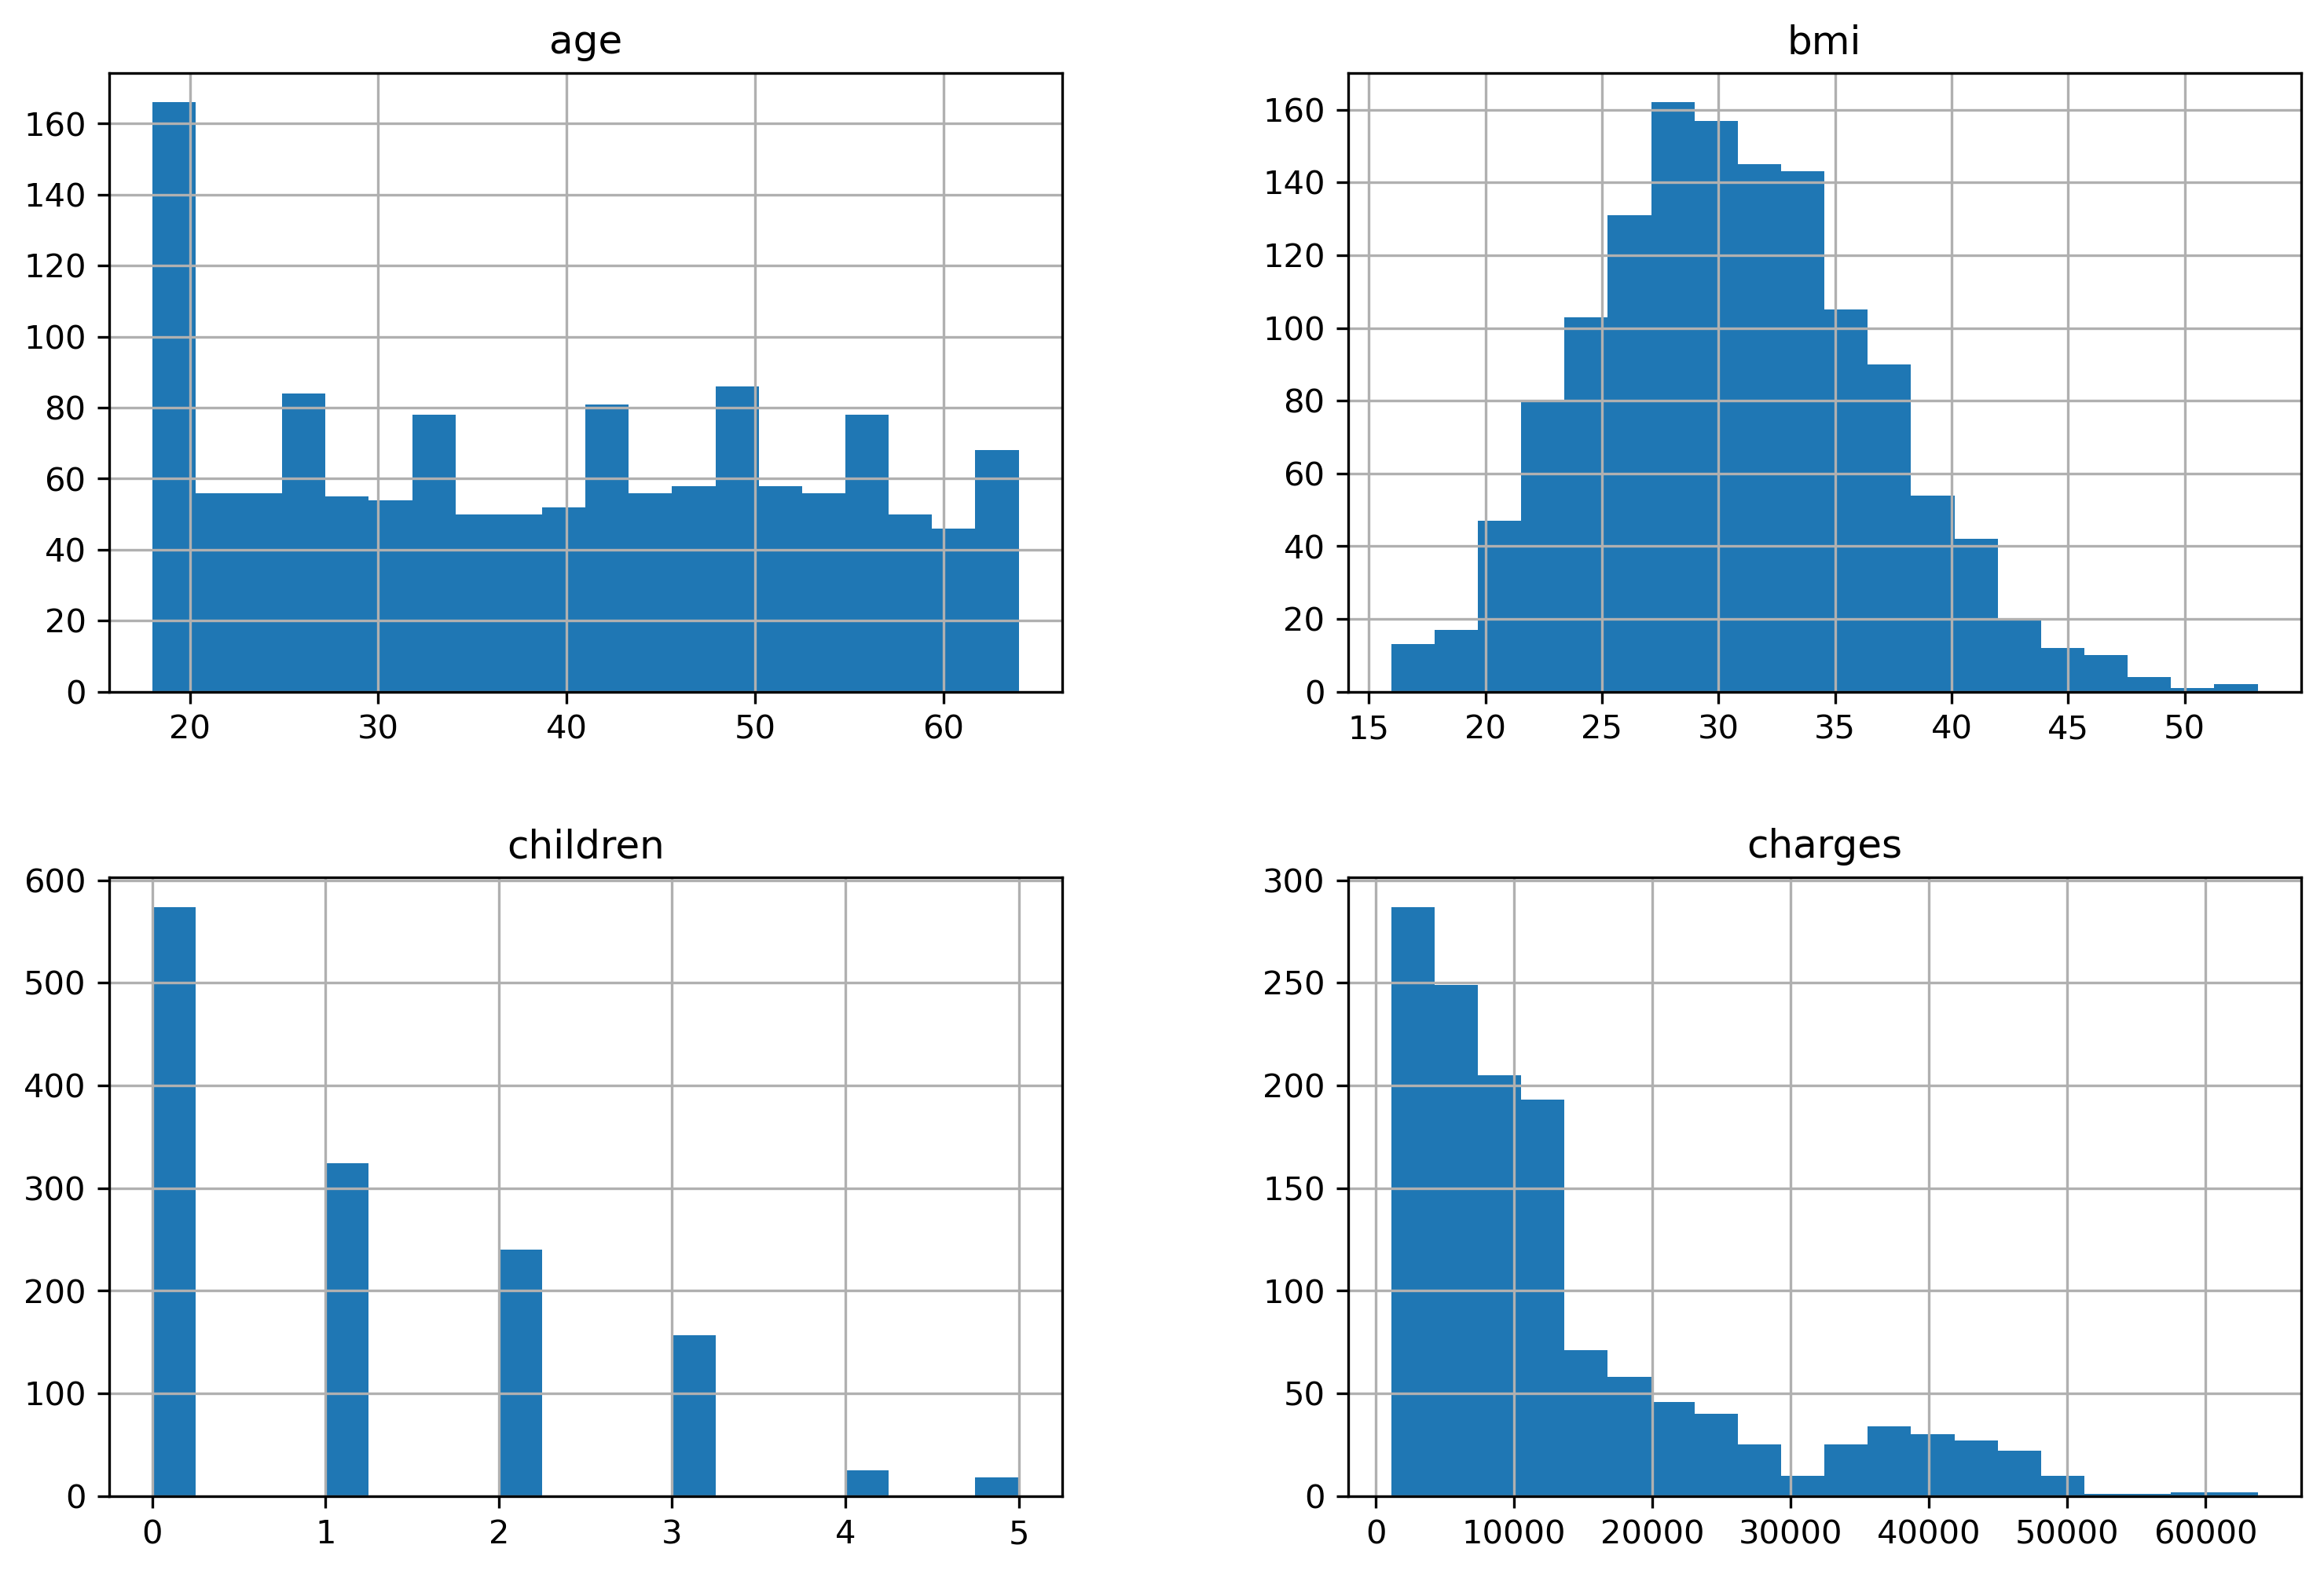

In [80]:
numeric = ['age', 'bmi', 'children', 'charges']

data[numeric].hist(bins=20, figsize = (12,8))
plt.show()

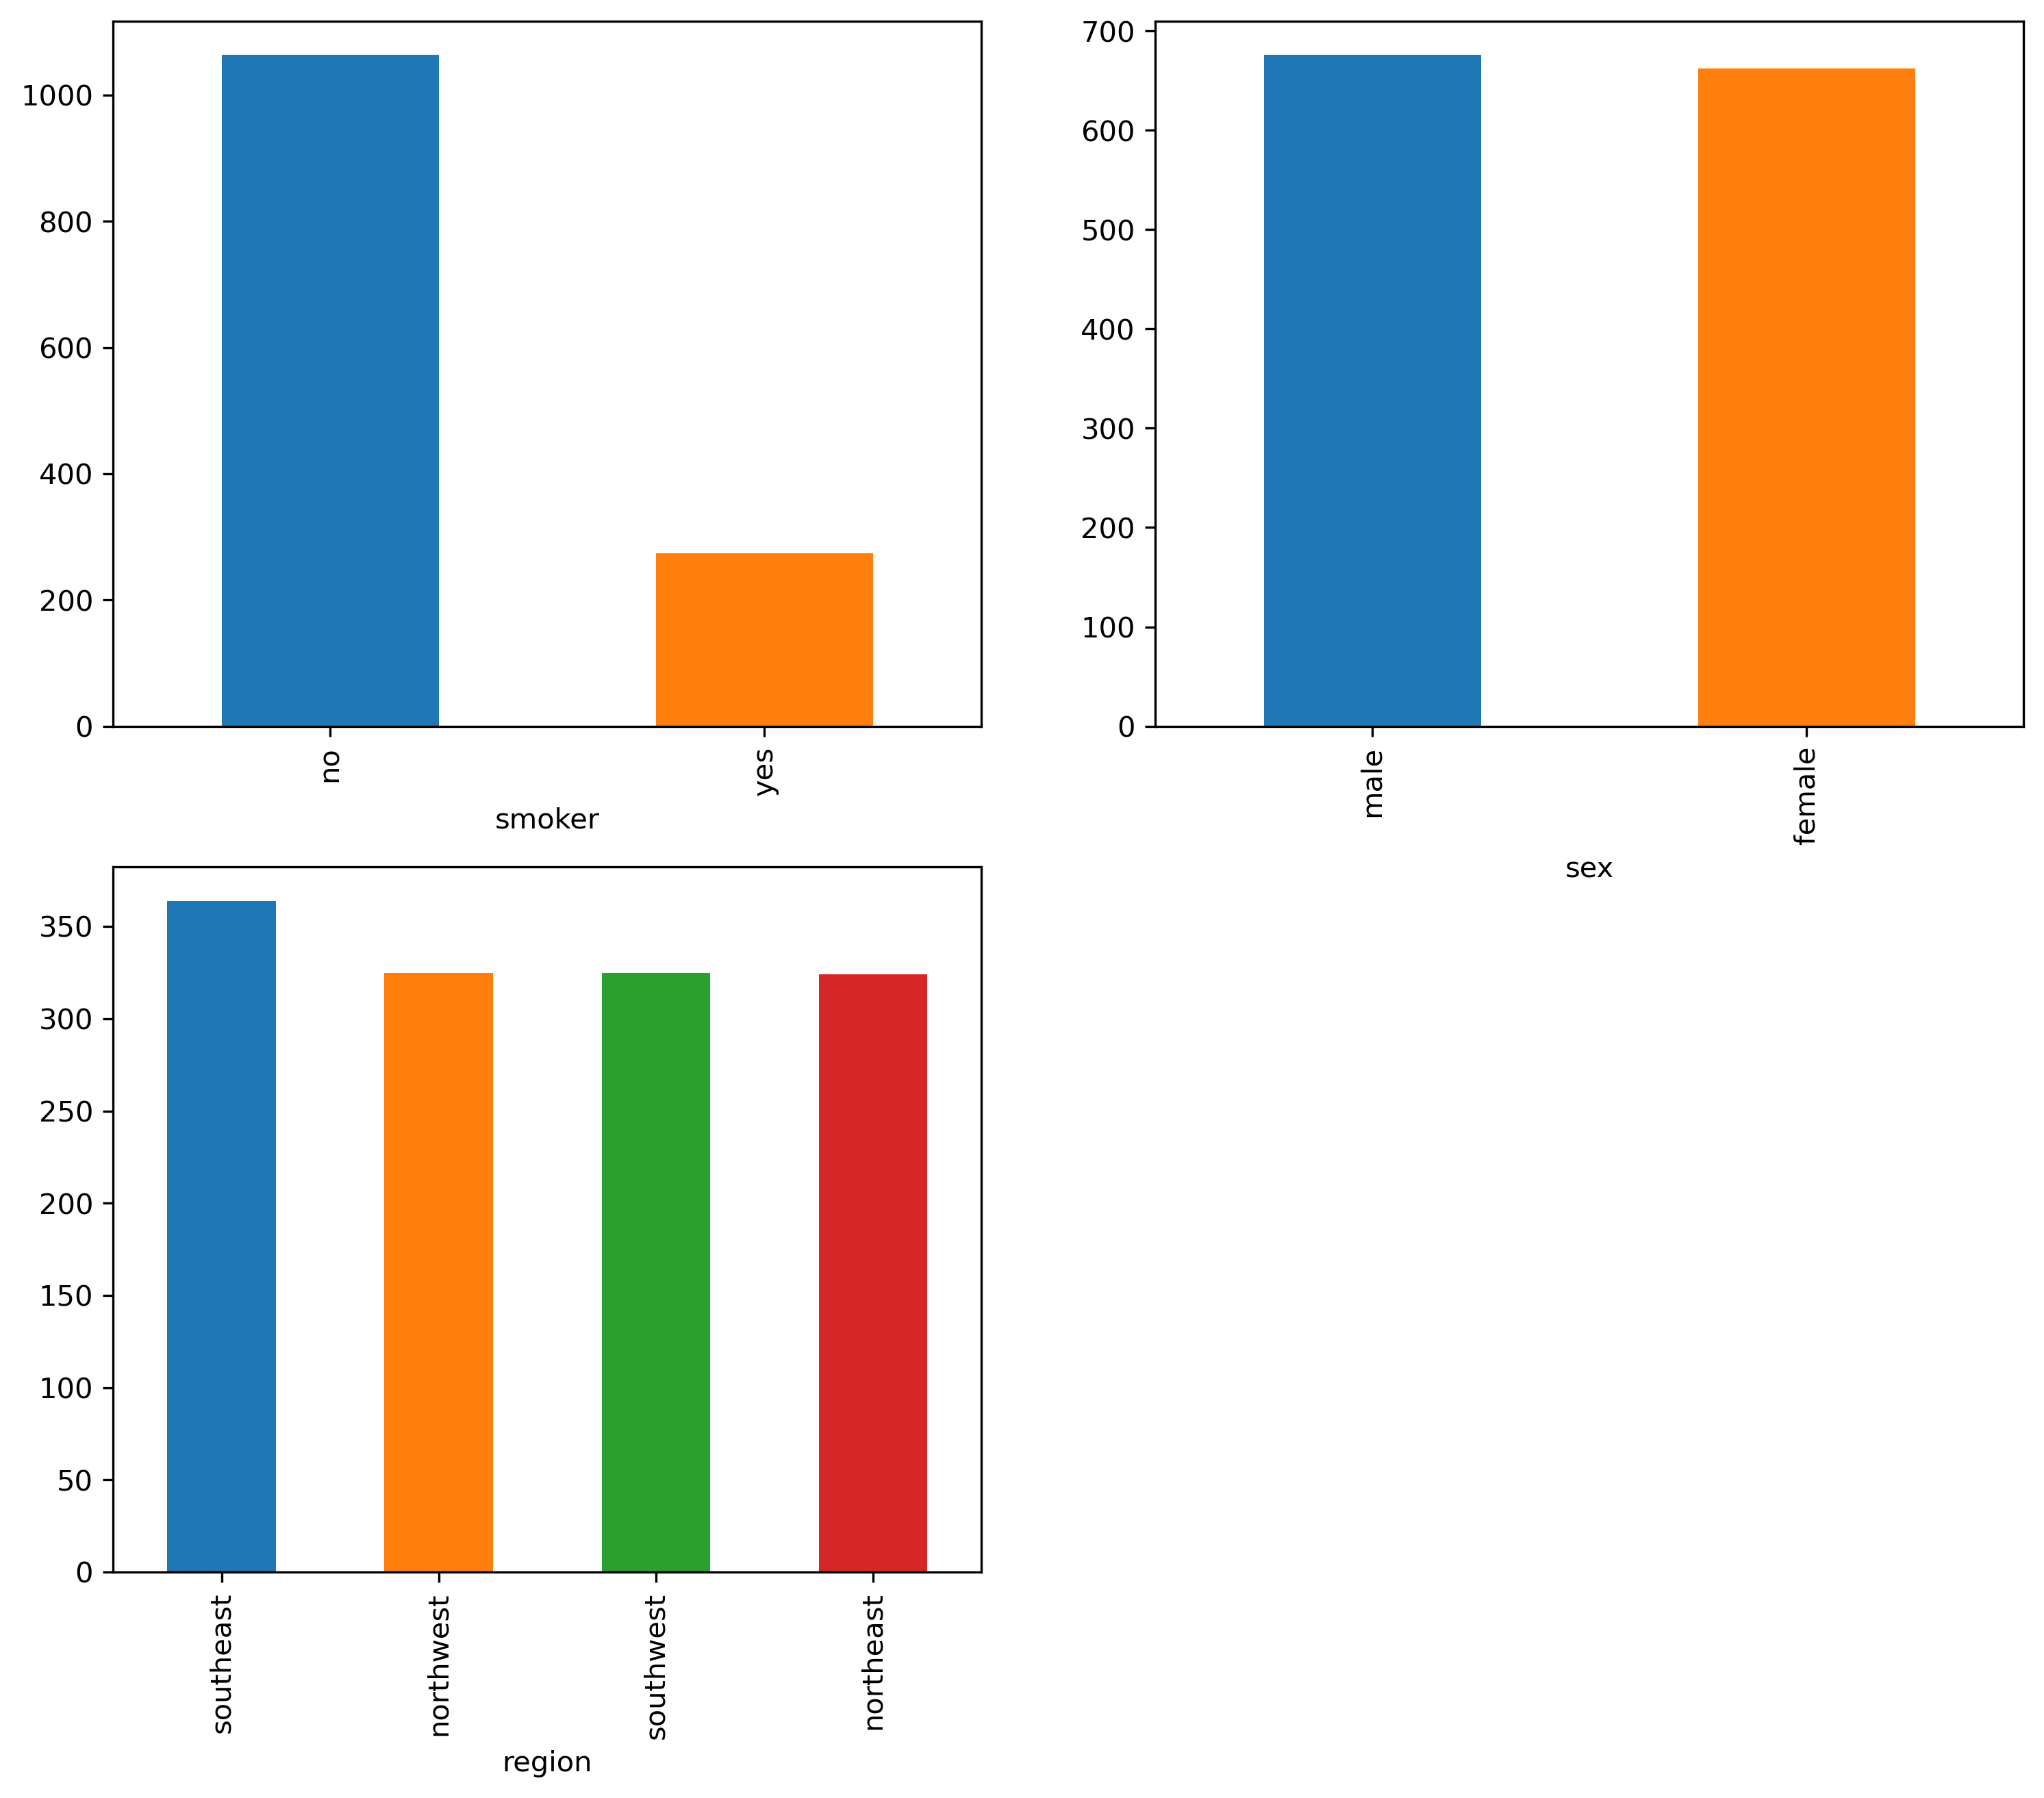

In [81]:
categorical = ['smoker', 'sex', 'region']
color = ['C0', 'C1', 'C2', 'C3']

fig, axes = plt.subplots(2, 2, figsize = (12,10))
axes[1,1].set_axis_off()

for ax, col in zip(axes.flatten(), categorical) :
    data[col].value_counts().plot(kind = 'bar', ax = ax, color = color)
    ax.set_xlabel(col)



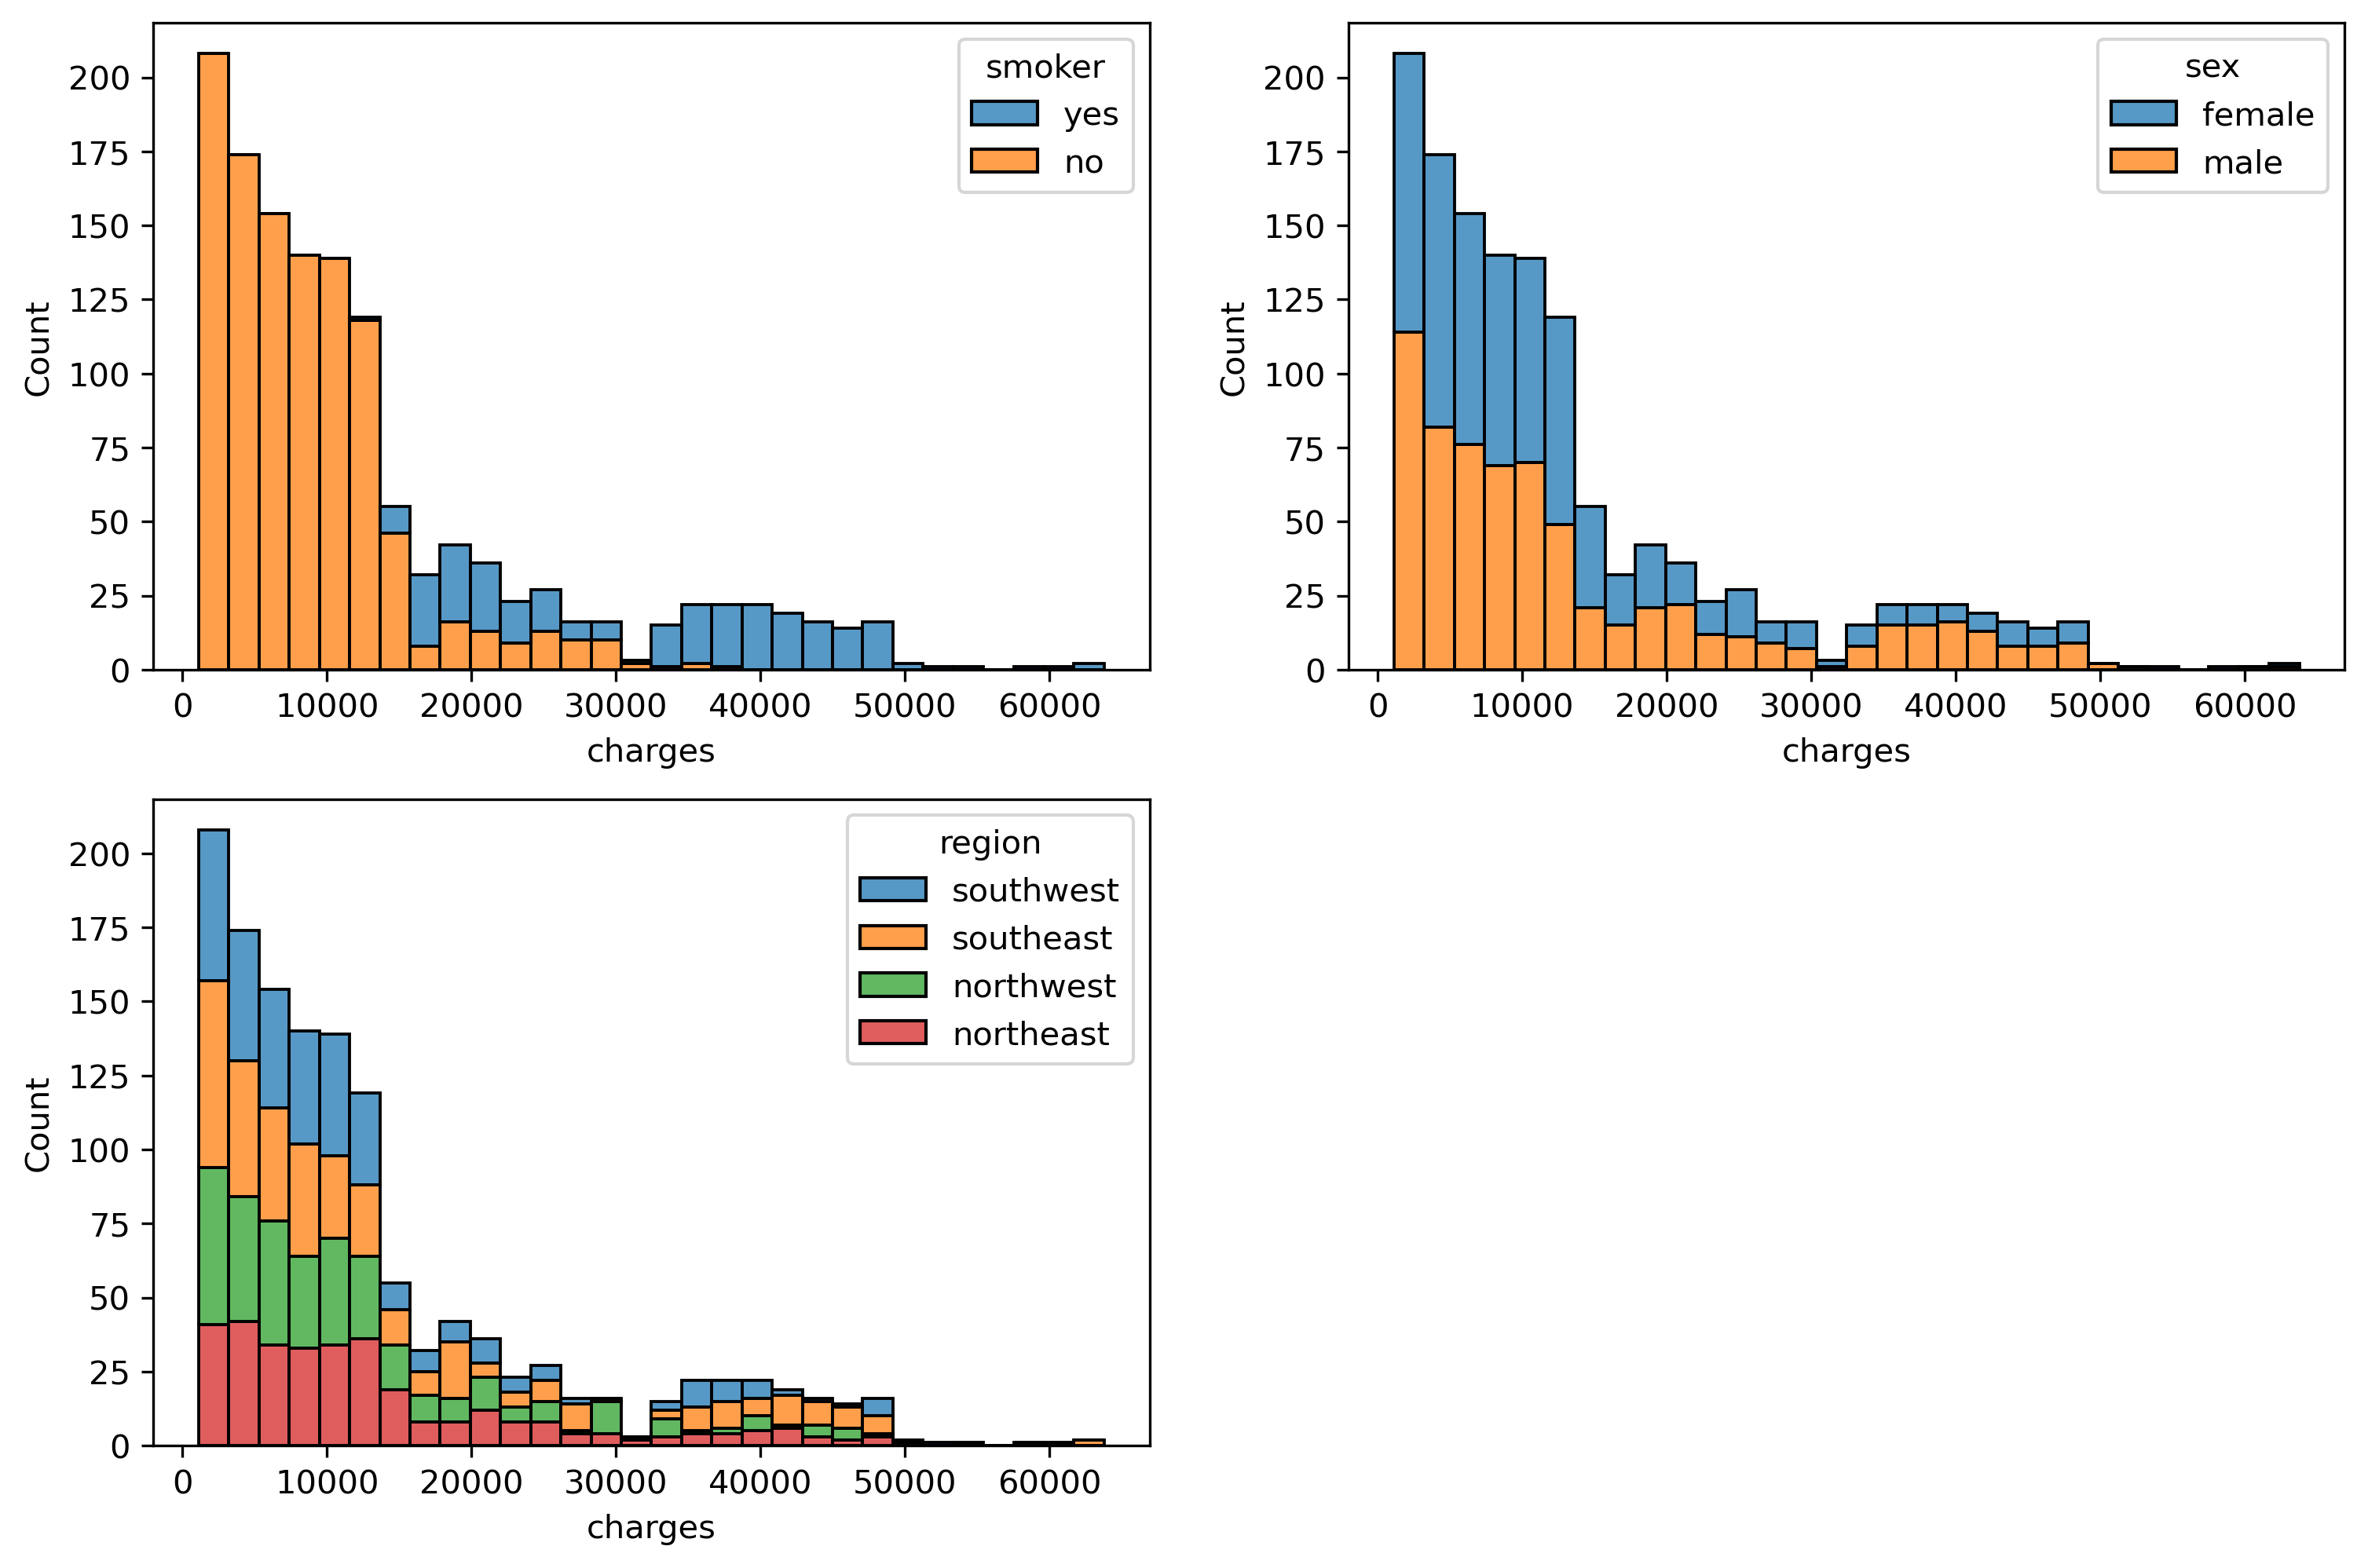

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes[1,1].set_axis_off()

for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data, x='charges', hue=col, multiple='stack', ax=ax)

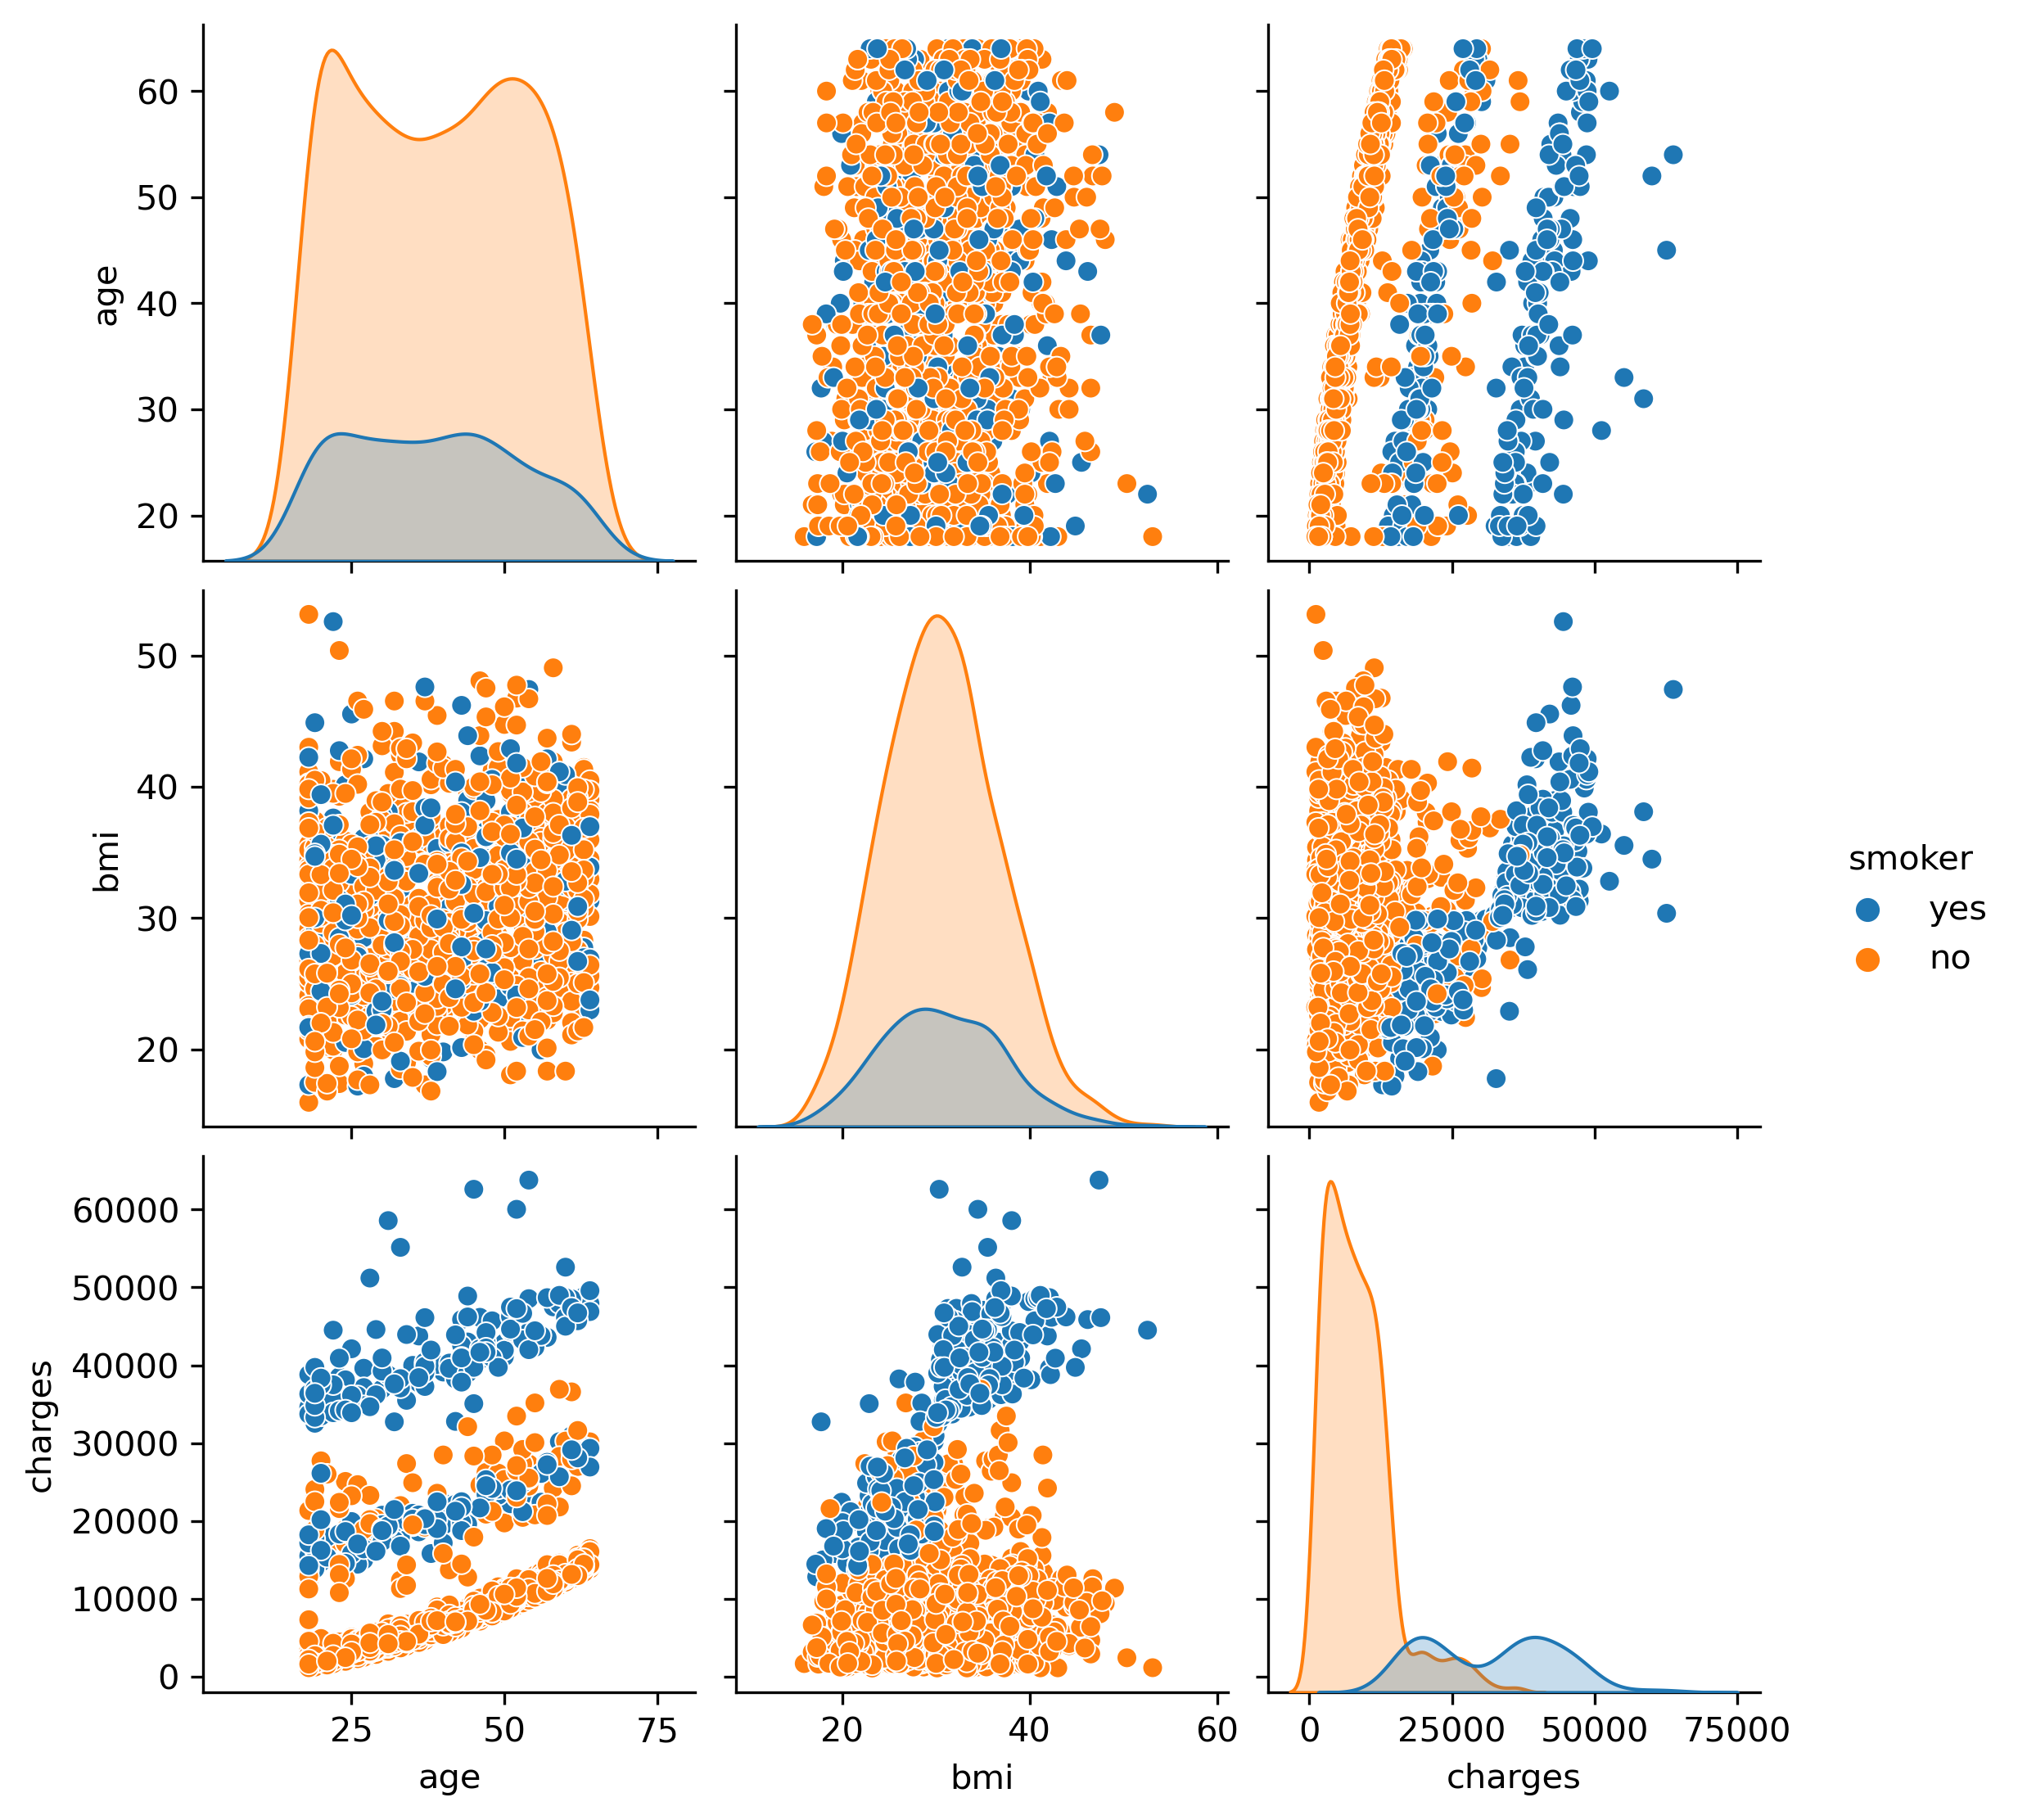

In [88]:
cols = ['age', 'bmi', 'charges', 'smoker']

sns.pairplot(data[cols], hue='smoker')
plt.show()

### Initializing the PyCaret Environment

In [51]:
numeric = ['age', 'bmi', 'children']

reg = setup(data=data, target='charges', train_size = 0.8, session_id = 7402,
            numeric_features = numeric, categorical_features = categorical,
            transformation = True, normalize = False, transform_target = True)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:52:23
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
sex,Categorical
bmi,Numeric
children,Numeric
smoker,Categorical
region,Categorical
charges,Label


 quit


SystemExit: Read the documentation of setup to learn how to overwrite data types over the inferred types. setup function must run again before you continue modeling.

In [ ]:
get_config('X')

### Comparing Regression Models

In [ ]:
best = compare_models(sort='RMSE')

### Creating a Model

In [ ]:
model = create_model('gbr', cross_validation = True, fold = 10)

### Tuning a Model

In [ ]:
params = {
        'learning_rate': [0.01, 0.02, 0.05],
        'max_depth': [1,2, 3, 4, 5, 6, 7, 8],
        'subsample': [0.4, 0.5, 0.6, 0.7, 0.8],
        'n_estimators' : [100, 200, 300, 400, 500, 600]
    }

tuned_model = tune_model(model, optimize = 'RMSE', fold = 10,
                       custom_grid = params, n_iter = 100)

### Plotting the Model

In [ ]:
plot_model(tuned_model, plot='error')

In [ ]:
plot_model(tuned_model, plot='feature')

### Making Predictions on New Data

In [ ]:
cols =  ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

records = [
       [30, 'male', 20, 0, 'no', 'southeast'],
       [30, 'male', 20, 0, 'yes', 'southeast'],
       [30, 'male', 35, 0, 'yes', 'southeast'],
       [70, 'male', 35, 0, 'yes', 'southeast'],
       [30, 'female', 20, 0, 'no', 'southeast'],
       [30, 'female', 20, 0, 'yes', 'southeast'],
       [30, 'female', 35, 0, 'yes', 'southeast'],
       [70, 'female', 35, 0, 'yes', 'southeast'] ]

new_data = pd.DataFrame(data = records, columns = cols)

predict_model(tuned_model, new_data)

### Finalizing and Saving the Model

In [ ]:
final_model = finalize_model(tuned_model)

save_model(final_model, 'regression_model')